# CSE391 
## Assignment 3
##  Due: Dec 8th at 11:59 pm


The goal of this assignment is to practice different clustering methods discussed in the class and visualize the clusters for N-dimensional data.

Visit this [page](https://www.mathworks.com/help/bioinfo/examples/gene-expression-profile-analysis.html) in which analysis of gene expression data is described in details.

You can download the data from the same page; The data are in .mat format but you can easily read them in Python using the proper methods developed for reading mat files.

You should write a script in Python (.ipynb) and use the scikit-learn to regenerate the following figures.

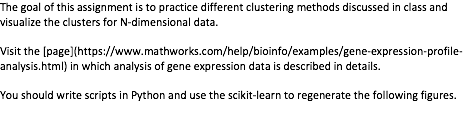

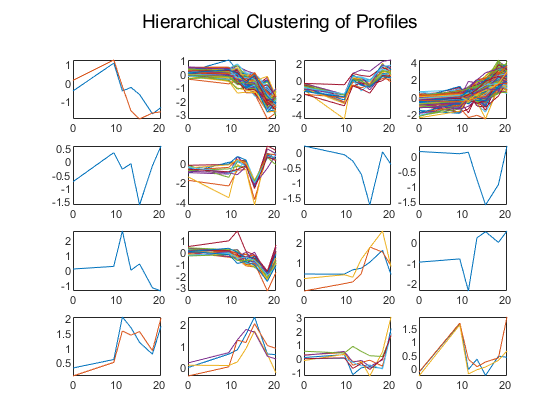

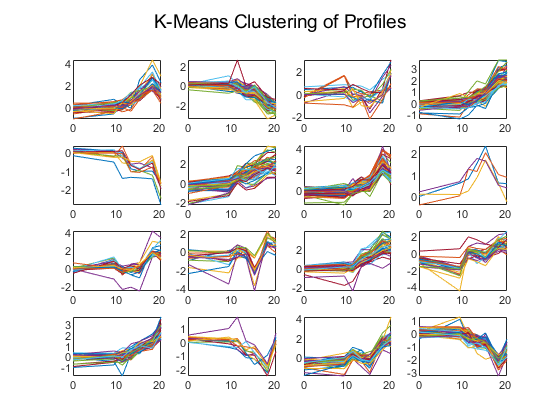

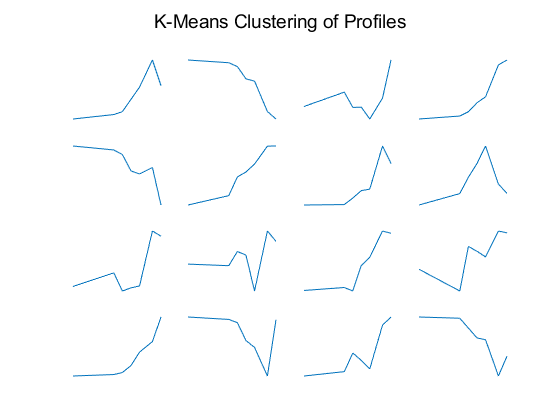

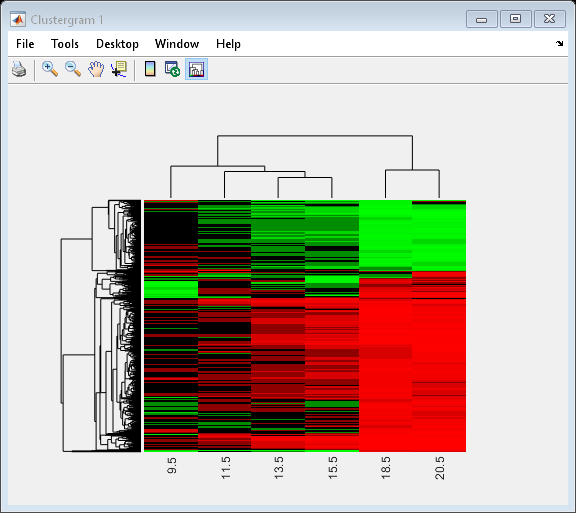

Text(0.5,0.98,'Hierchial Clustering of Profiles')

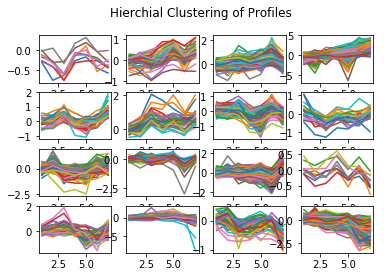

In [13]:

import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from matplotlib.pyplot import axis
from matplotlib.pyplot import suptitle



data = sio.loadmat('yeastdata.mat')
# data
t = pd.DataFrame(np.hstack((data['times'])))
drp = pd.DataFrame(np.hstack((data['genes'], data['yeastvalues'])))
drp = drp[drp[0]!= 'EMPTY']
drp = drp.dropna()
array = drp.values

variances = [np.var(array[i][1:]) for i in range(array.shape[0])]
ten_percenth = np.percentile(variances, 10)
drp['variances'] = variances
drp = drp[drp['variances'] > ten_percenth]
drp = drp.drop(columns = 'variances')
yeast_values = drp.iloc[:, 1:]
corrDist = pdist(yeast_values, 'correlation')
cT = linkage(corrDist, method = 'average')
c = sch.fcluster(cT, 16, criterion = 'maxclust')
# print(c)
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.plot([1,2,3,4,5,6,7], yeast_values.iloc[c == i,:].T)
    
kmeans = KMeans(n_clusters = 16, max_iter = 5).fit(yeast_values)
centers = kmeans.cluster_centers_
lbls = kmeans.labels_
suptitle("Hierchial Clustering of Profiles")



         



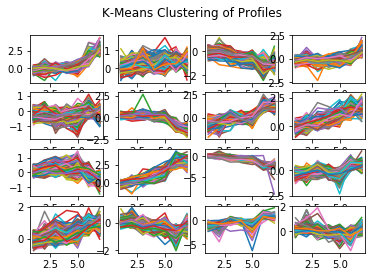

In [14]:
for j in range(16):
    plt.subplot(4,4,j+1)
    plt.plot([1,2,3,4,5,6,7], yeast_values.iloc[lbls == j, :].T)
suptitle('K-Means Clustering of Profiles');



Text(0.5,0.98,'Kmeans clustering of profiles')

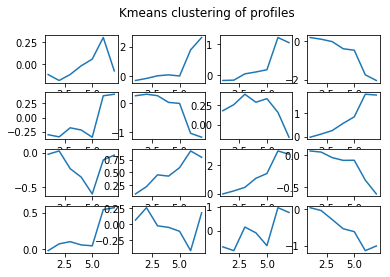

In [8]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot([1,2,3,4,5,6,7], centers[i, : ])
    axis(option='tight')
    axis(option='off')
suptitle("Kmeans clustering of profiles")


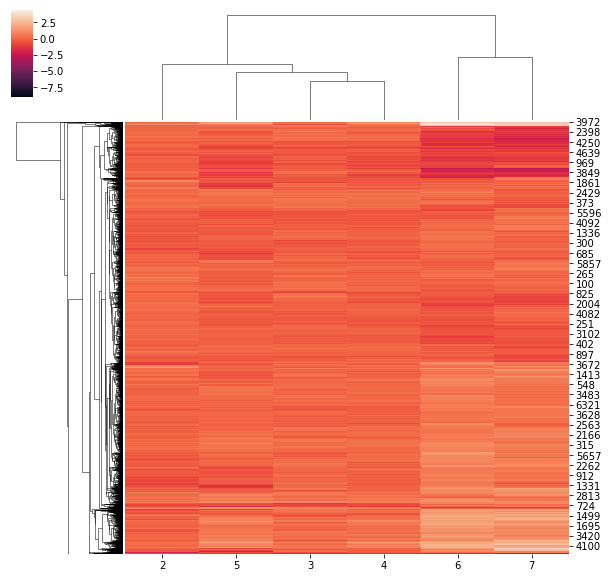

In [16]:
from seaborn import clustermap

clstr = clustermap(drp.iloc[:,2:].astype('float'))